# KNN Time Series Forecasting for NVIDIA Stock Prices

## Data Extraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
from sklearn.model_selection import train_test_split


import yfinance as yf

In [ ]:
# Define the stock list
stocks_list = ['NVDA']

# Define the date range
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

# Download stock data
for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)

# Reset the index and rename columns
NVDA.reset_index(inplace=True)
NVDA.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Check for NaN values in each column
print("\nNumber of NaN values in each column:")
print(NVDA.isna().sum())

[*********************100%***********************]  1 of 1 completed


Number of NaN values in each column:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


## Data Pre-Processing

In [ ]:
# Create a new data frame with Close
nvidia_data = NVDA[['Date', 'Close']]

# Drop rows where 'Close' is NaN
nvidia_data = nvidia_data.dropna(subset=['Close'])

In [ ]:
# Convert Date from Timestamp to Ordinal
nvidia_data['Date_ord'] = nvidia_data['Date'].map(pd.Timestamp.toordinal)

In [ ]:
# Scale Close Values
# Create X and y Vars
X = nvidia_data[['Date_ord']]
scaler = StandardScaler()
nvidia_data['Close'] = scaler.fit_transform(nvidia_data[['Close']])
y = nvidia_data['Close']
#y = (nvidia_data['Close'] - nvidia_data['Close'].mean()) / nvidia_data['Close'].std()


In [ ]:
print(y)

0     -1.261436
1     -1.260237
2     -1.268684
3     -1.263418
4     -1.244255
         ...   
498    2.047475
499    2.076937
500    2.050343
501    2.069376
502    2.019578
Name: Close, Length: 503, dtype: float64


In [ ]:
# Split Data into Train and Test Sets
# 80/20 Train/Test Ratio
# shuffle is false to keep it in order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



## K-Nearest Neighbors (KNN)

In [ ]:
# Build Model and Fit
# Using Regression for Continuous Data
knn_model = KNeighborsRegressor(n_neighbors = 5) # Using 5 neighbors, could use 1?
knn_model.fit(X_train, y_train) # changed to 1 for now




KNeighborsRegressor()

In [ ]:
# Predict
y_pred = knn_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred = y_pred.flatten()
print(y_pred)

[1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753
 1.43455753 1.43455753 1.43455753 1.43455753 1.43455753 1.4345

In [ ]:
# Evaluate KNN Model using RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {knn_rmse}')

Root Mean Squared Error: 0.31250435673905613


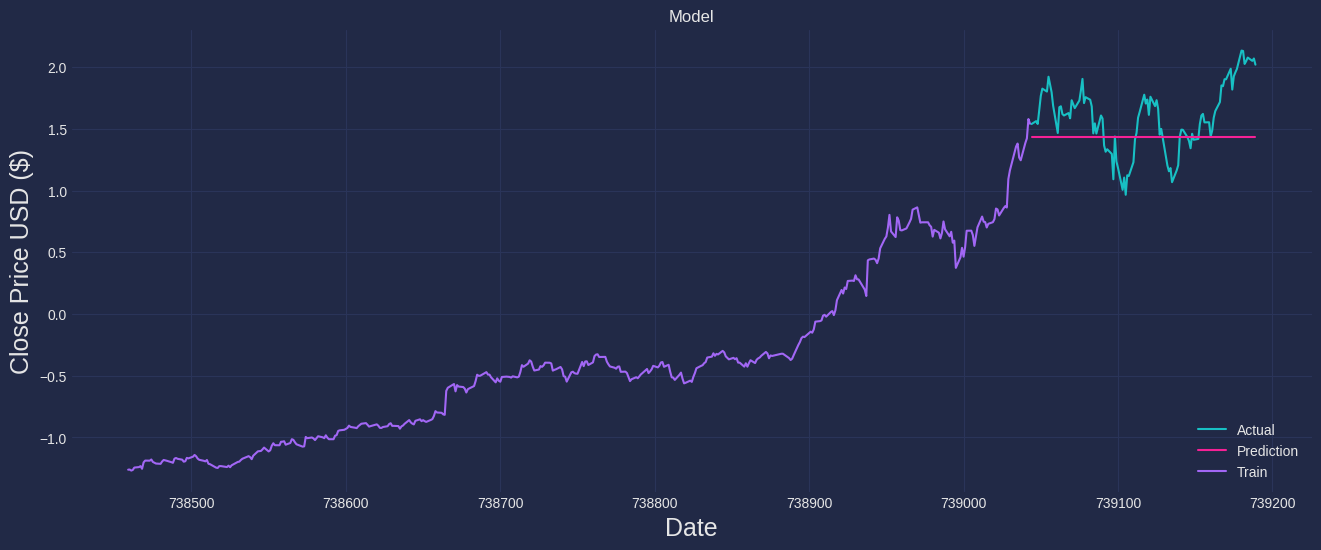

In [ ]:
# Plot the predicted stock prices against KNN actual prices

# Convert Ordinal Date back to Timestamp
#timestamp_date = []
#for date in X_test:
 # if date[0] >= 1:
 #   timestamp_date.append(pd.Timestamp.fromordinal(int(date[0])))
 # else:
  #  timestamp_date.append(pd.NaT)

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(timestamp_date, y_test, label='Actual')
#plt.plot(timestamp_date, y_pred, label='Prediction')

plt.plot(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, label='Prediction')
plt.plot(X_train, y_train, label='Train')
plt.legend(loc='lower right')
plt.show()

In [ ]:
actual_vs_pred = [[nvidia_data['Close'][int(len(nvidia_data) * 0.8):], y_pred]]
i = 0
while i <= len(actual_vs_pred):
  print(actual_vs_pred[i][0], actual_vs_pred[i][1])
  i += 1

402    120.888000
403    121.790001
404    120.910004
405    125.199997
406    129.610001
          ...    
498    140.410004
499    141.539993
500    140.520004
501    141.250000
502    139.339996
Name: Close, Length: 101, dtype: float64 [116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.90160065 116.90160065 116.90160065
 116.90160065 116.90160065 116.9016

IndexError: list index out of range

Text(0, 0.5, 'Actual Values')

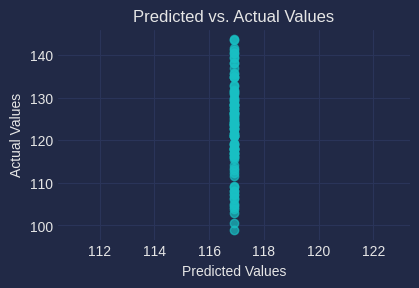

In [ ]:
# Evaluate how well the KNN model performs.
# If the predictions perfectly match the actual values, the points should align along a straight line with a slope of 1.

actual_values = y_test
knn_predicted_values = y_pred

plt.figure(figsize=(10, 6))

# Scatter plot of predicted vs. actual values
plt.subplot(2, 2, 1)
plt.scatter(knn_predicted_values, actual_values, alpha=0.7)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')